In [1]:
from module import tools as tl

In [2]:
url ='data/Net_generation_for_all_sectors.csv'
denrgt = tl.EnergyPrediction(url)

In [3]:
denrgt.data.head()

,Other renewables,Wind,All utility-scale solar,Geothermal,Wood and wood-derived fuels,Other biomass
Date,,,,,,
2001-01-01,6025.0,389.0,7.0,1229.0,3191.0,1209.0
2001-02-01,5310.0,431.0,13.0,1073.0,2697.0,1096.0
2001-03-01,5795.0,532.0,31.0,1190.0,2853.0,1189.0
2001-04-01,5827.0,685.0,39.0,1095.0,2821.0,1187.0
2001-05-01,5738.0,635.0,81.0,1071.0,2740.0,1211.0


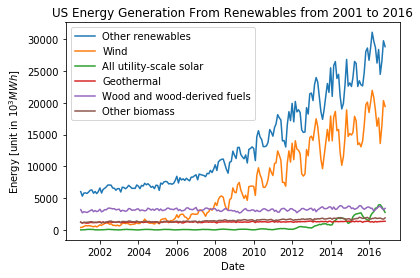

In [4]:
denrgt.showEnergyGen()

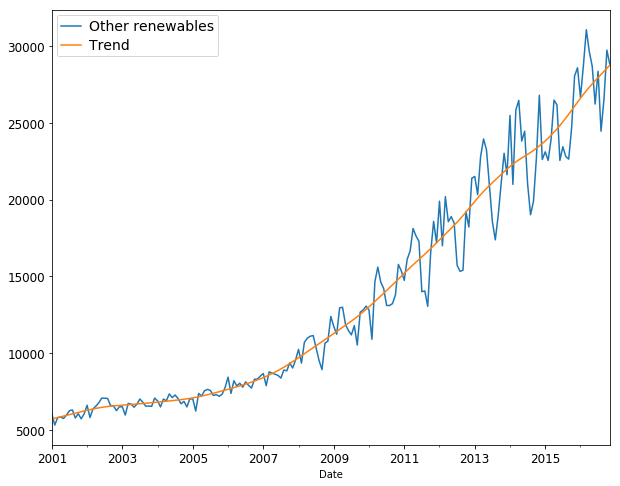

In [5]:
denrgt.showTrendGen(denrgt.data[[denrgt.data.columns[0]]])

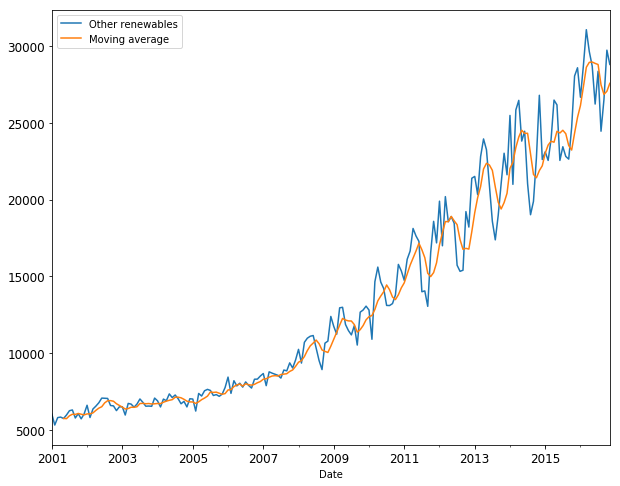

In [6]:
denrgt.promMov(denrgt.data[[denrgt.data.columns[0]]]);

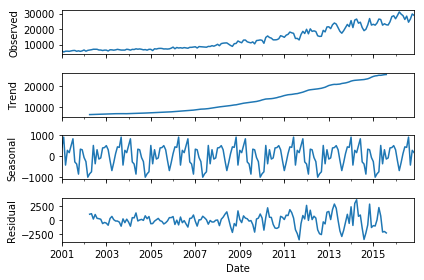

In [7]:
denrgt.descST(denrgt.data[[denrgt.data.columns[0]]])

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


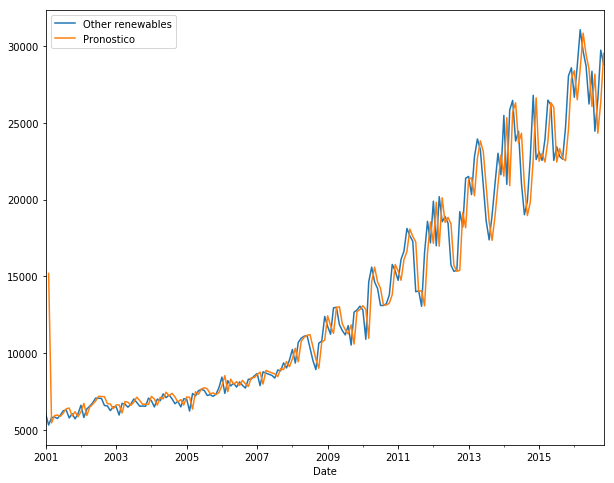

In [8]:
denrgt.adjuARIMA(denrgt.data[[denrgt.data.columns[0]]])

In [9]:
denrgt.data[[denrgt.data.columns[0]]].head()

,Other renewables
Date,
2001-01-01,6025.0
2001-02-01,5310.0
2001-03-01,5795.0
2001-04-01,5827.0
2001-05-01,5738.0


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import datetime
#import pmdarima as pm

In [11]:
#modelo = sm.tsa.ARIMA(denrgt.data[denrgt.data.columns[0]].iloc[:180], order=(4, 1, 3), freq = 'MS')  
#resultados = modelo.fit(disp=5)

modelo= sm.tsa.statespace.SARIMAX(denrgt.data[denrgt.data.columns[0]].iloc[:180], trend='n', order=(1,1,1), seasonal_order=(1,1,1,12),freq = 'MS')
resultados = modelo.fit()
print(denrgt.data[denrgt.data.columns[0]].iloc[:180])



Date
2001-01-01     6025.0
2001-02-01     5310.0
2001-03-01     5795.0
2001-04-01     5827.0
2001-05-01     5738.0
2001-06-01     5964.0
2001-07-01     6244.0
2001-08-01     6293.0
2001-09-01     5770.0
2001-10-01     6050.0
2001-11-01     5713.0
2001-12-01     6038.0
2002-01-01     6599.0
2002-02-01     5800.0
2002-03-01     6354.0
2002-04-01     6543.0
2002-05-01     6760.0
2002-06-01     7066.0
2002-07-01     7056.0
2002-08-01     7044.0
2002-09-01     6582.0
2002-10-01     6559.0
2002-11-01     6250.0
2002-12-01     6497.0
2003-01-01     6500.0
2003-02-01     5962.0
2003-03-01     6719.0
2003-04-01     6674.0
2003-05-01     6473.0
2003-06-01     6678.0
               ...   
2013-07-01    18593.0
2013-08-01    17382.0
2013-09-01    18991.0
2013-10-01    21058.0
2013-11-01    23030.0
2013-12-01    21626.0
2014-01-01    25493.0
2014-02-01    21001.0
2014-03-01    25851.0
2014-04-01    26476.0
2014-05-01    23822.0
2014-06-01    24464.0
2014-07-01    21044.0
2014-08-01    19021.0
2014-

In [12]:
#fc, se, conf = resultados.forecast(25, alpha=0.05)  # 95% conf
denrgt.data['forecast'] = resultados.predict(start = 180, end= 220, dynamic= True)  

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [13]:
fc_series = pd.Series(denrgt.data['forecast'], index=denrgt.data[denrgt.data.columns[0]].iloc[180:].index)
#lower_series = pd.Series(conf[:, 0], index=denrgt.data[denrgt.data.columns[0]].iloc[166:].index)
#upper_series = pd.Series(conf[:, 1], index=denrgt.data[denrgt.data.columns[0]].iloc[166:].index)

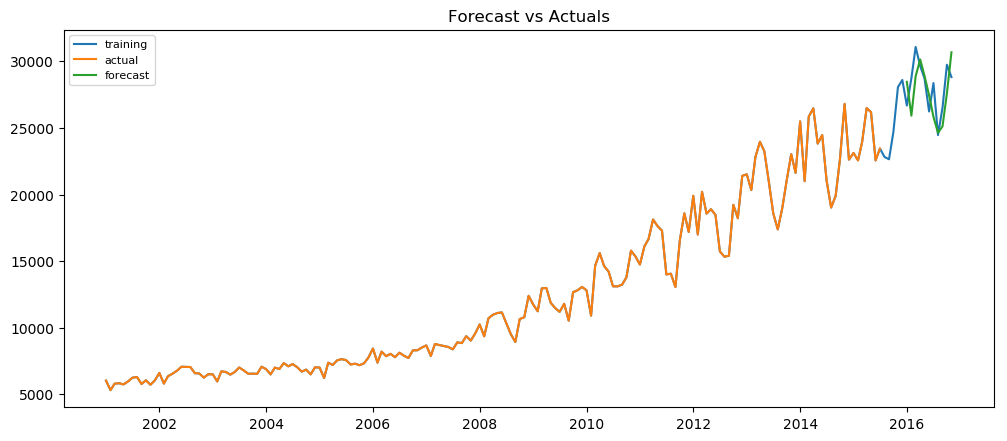

In [14]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(denrgt.data[denrgt.data.columns[0]].iloc[0:], label='training')
plt.plot(denrgt.data[denrgt.data.columns[0]].iloc[:175], label='actual')
plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
#                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [15]:
fc_series
denrgt.data

,Other renewables,Wind,All utility-scale solar,Geothermal,Wood and wood-derived fuels,Other biomass,forecast
Date,,,,,,,
2001-01-01,6025.0,389.0,7.0,1229.0,3191.0,1209.0,NaN
2001-02-01,5310.0,431.0,13.0,1073.0,2697.0,1096.0,NaN
2001-03-01,5795.0,532.0,31.0,1190.0,2853.0,1189.0,NaN
2001-04-01,5827.0,685.0,39.0,1095.0,2821.0,1187.0,NaN
2001-05-01,5738.0,635.0,81.0,1071.0,2740.0,1211.0,NaN
2001-06-01,5964.0,670.0,91.0,1088.0,2891.0,1225.0,NaN
2001-07-01,6244.0,635.0,92.0,1179.0,3053.0,1286.0,NaN
2001-08-01,6293.0,577.0,85.0,1167.0,3179.0,1285.0,NaN
2001-09-01,5770.0,490.0,65.0,1139.0,2874.0,1201.0,NaN


In [16]:
start = datetime.datetime.strptime("2016-12-01", "%Y-%m-%d")
#date_list = [start + relativedelta(months=x) for x in range(0,12)]
date_list = pd.date_range(denrgt.data.index[-1], periods = 20, freq='MS')

future = pd.DataFrame(index=date_list, columns= denrgt.data.columns)
denrgt.data = pd.concat([denrgt.data, future])

In [24]:
denrgt.data['forecast'] = resultados.predict(start = 180, end= 240)  

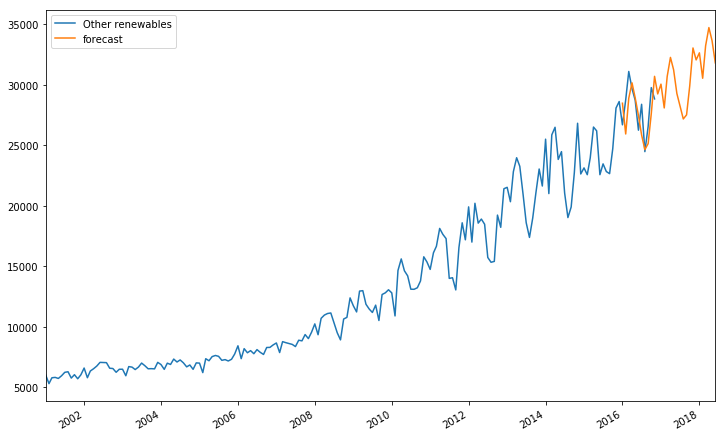

In [25]:
denrgt.data[['Other renewables', 'forecast']].plot(figsize=(12, 8)) 